In [7]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [8]:
import tensorflow.keras.utils as tku

In [9]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', parser='auto')

In [10]:
print(mnist)

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ..

In [12]:
print(mnist['data'])

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel7

In [20]:
x,Y=mnist['data'], mnist['target']

In [21]:
print(x)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel7

In [22]:
print(Y)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [23]:
x.shape

(70000, 784)

In [24]:
Y.shape

(70000,)

In [25]:
X=x.to_numpy()

In [26]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
y=Y.to_numpy()

In [28]:
print(y)

['5' '0' '4' ... '4' '5' '6']


In [90]:
demo_digit=X[675]
demo_digit=demo_digit.reshape(28,28)

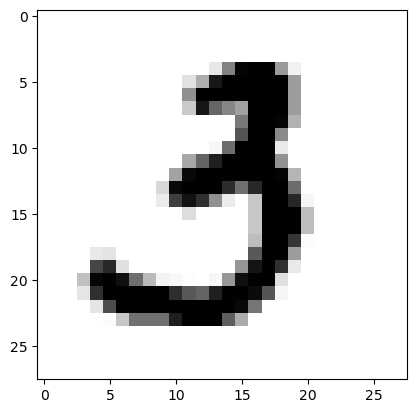

In [91]:
plt.imshow(demo_digit, cmap=matplotlib.cm.binary, interpolation='nearest')

In [39]:
print(y[[675]])

['3']


In [40]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=0)

In [69]:

y_train_categorical = tku.to_categorical(y_train, num_classes=10)
y_test_categorical = tku.to_categorical(y_test, num_classes=10)
cnn=tf.keras.models.Sequential()

In [70]:
cnn.add(tf.keras.layers.Dense(64, activation='relu',input_dim=784))
cnn.add(tf.keras.layers.Dense(64, activation='relu'))
cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

In [71]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [72]:
cnn.fit(X_train,tku.to_categorical(y_train),epochs=5,batch_size=32)

Epoch 1/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7842 - loss: 5.5892
Epoch 2/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9115 - loss: 0.4052
Epoch 3/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9322 - loss: 0.2743
Epoch 4/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9378 - loss: 0.2365
Epoch 5/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9493 - loss: 0.1920


In [73]:
cnn.evaluate(X_test, tku.to_categorical(y_test))

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9394 - loss: 0.2232


[0.2375200241804123, 0.9368571639060974]

In [92]:
test_image=X[675]

In [93]:
test_image=np.expand_dims(test_image, axis=0)
result=cnn.predict(test_image)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[4.8200550e-15 1.5992098e-08 2.8147701e-11 9.9999309e-01 3.1765840e-19
  6.8642667e-06 2.2703874e-16 2.4744293e-09 6.8885057e-11 7.2010330e-08]]
